# Esercizio finale 2

### Esercizio riepilogativo di numpy, pandas, matplotlib e seaborn

L'obiettivo di questo esercizio è generare un set di dati, analizzarli con pandas e visualizzarli con matplotlib e seaborn.

Devono essere implementati i seguenti punti:

1. __Gerazione dei dati__: con numpy, generare una serie temporale di 305 giorni di dati, simulando il numero di visitatori giornalieri in un ospedale. Assumere che il numero medio di visitatori sia 1200 con una deviazione standard di 900. Mano mano che il tempo passa, la media aumenta progressivamente mentre la deviazione standard diminuisce progressivamente.

2. __Creazione del DataFrame__: creare un dataframe pandas con le date come indice e il numero di visitatori come colonna. Ogni visitatore ha una "motivazione" per il ricovero (problema alle ossa, al cuore, alla testa), generata casualmente. 

3. __Analisi dei dati__: calcolare il numero medio di visitatori per mese e la deviazione standard e quale patologia è più o meno trovata.

4. __Visualizzazione dei dati__: 
    - creare un grafico a linee del numero di visitatori gionralieri
    - aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale
    - creare un secondo grafico che mostri la media mensile dei visitatori.
    - creare un grafioc che mostri la distribuzione dei motivi per il ricovero.

# Import Librerie

In [ ]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generazione dei dati


 con numpy, generare una serie temporale di 305 giorni di dati, simulando il numero di visitatori giornalieri in un ospedale. Assumere che il numero medio di visitatori sia 1200 con una deviazione standard di 900. Mano mano che il tempo passa, la media aumenta progressivamente mentre la deviazione standard diminuisce progressivamente.

Per semplicità, genero un attimo una versione con la media e la deviazione fisse.

In [ ]:
# genera time series con pandas
list_date = pd.date_range(start='2024-01-01', periods=305, freq='D')

# n_visitatori è una lista dei numeri di visitatori 
# nb : il numero di visitatori deve essere intero positivo
n_visitatori = []
# parametri per la distr normale
avg=1200
std=900
for giorno in list_date:
    random_number = -1
    # se il numero di visitatori è negativo, lo scarto e ne genero un altro 
    while random_number < 0:
        random_number = np.random.normal(loc=avg, scale=std)
        if random_number >= 0:
            n_visitatori.append(int(random_number))
    # ogni giorno, la media aumenta e la deviazione standard diminuisce        
    avg = avg*1.001
    std = std*0.99


# 2. Creazione del DataFrame

Creare un dataframe pandas con le date come indice e il numero di visitatori come colonna. Ogni visitatore ha una "motivazione" per il ricovero (problema alle ossa, al cuore, alla testa), generata casualmente. 

Dunque genererò due dataframe. Il primo è:

DataFrame __date__

Indice: data 

Colonne: numero_visitatori, n_visitatori_testa, n_visitatori_cuore, n_visitatori_testa


DataFrame __visitatori__

Indice: id 

Colonne: data, motivazione=("ossa" oppure "cuore" oppure "testa")

### Generazione Dataframe date

In [32]:
# create a dictionary with date and number of visitors
date = pd.DataFrame({'giorno': list_date, 'n_visitatori': n_visitatori})

In [59]:
date.head(-10)

,giorno,n_visitatori
0,2024-01-01,1074
1,2024-01-02,1698
2,2024-01-03,795
3,2024-01-04,2739
4,2024-01-05,190
...,...,...
290,2024-10-17,1531
291,2024-10-18,1692
292,2024-10-19,1657
293,2024-10-20,1581


### Generazione Dataframe visitatori

In [ ]:
# genero due liste con le quali creare il dataframe visitatori
# una che contiene il giorno ripetuto tante volte quante sono i visitatori del giorno 
# l'altra che in corrispondenza genera una motivazione casuale
# queste due liste avranno la stessa lunghezza e messe insieme identificano un singolo visitatore

indici_giorni = []
motivazioni = []
for giorno in date.giorno:
    n_visitatori_odierno = date.loc[date['giorno'] == giorno, 'n_visitatori'].values[0]
    #print(f"Giorno {giorno}")
    #print(f"Visitatori tot: {n_visitatori_odierno}")
    for i in range(n_visitatori_odierno):
        motivazioni.append(random.choice(["ossa", "cuore", "testa"]))
        #print(f"Motivazione: {motivazione}")
        indici_giorni.append(giorno)

In [ ]:
#creo il dataframe visitatori, che ha come colonne data e motivazione
visitatori = pd.DataFrame({'data': indici_giorni,'motivazione': motivazioni})

In [60]:
visitatori.tail()

,data,motivazione,mese
423914,2024-10-31,testa,10
423915,2024-10-31,ossa,10
423916,2024-10-31,ossa,10
423917,2024-10-31,ossa,10
423918,2024-10-31,ossa,10


# 3. Analisi dei dati

 calcolare il numero medio di visitatori per mese e la deviazione standard e quale patologia è più o meno trovata.


In [ ]:
# calcolo media e deviazione standard di visitatori per mese
n_visitatori_giornalieri_mese = []
media_mese = []
std_mese = []
# for per scorrere sui mesi
for i in date["mese"].unique():
    n_visitatori_giornalieri_mese.append(date[date['mese'] == i]["n_visitatori"])
    media_mese.append(n_visitatori_giornalieri_mese[i-1].mean())
    std_mese.append(n_visitatori_giornalieri_mese[i-1].std())


In [ ]:
# count occorrenza di ogni motivazione
motivazioni_count = visitatori['motivazione'].value_counts()
print("Occorrenza totale delle motivazioni:")
print(motivazioni_count)

Occorrenza totale delle motivazioni:
motivazione
cuore    141694
ossa     141117
testa    141108
Name: count, dtype: int64


# 4. Visualizzazione dei dati 
- creare un grafico a linee del numero di visitatori gionralieri
- aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale
- creare un secondo grafico che mostri la media mensile dei visitatori.
- creare un grafioc che mostri la distribuzione dei motivi per il ricovero.

### Numero di visitatori giornalieri

(array([19723., 19754., 19783., 19814., 19844., 19875., 19905., 19936.,
        19967., 19997., 20028.]),
 [Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02'),
  Text(19783.0, 0, '2024-03'),
  Text(19814.0, 0, '2024-04'),
  Text(19844.0, 0, '2024-05'),
  Text(19875.0, 0, '2024-06'),
  Text(19905.0, 0, '2024-07'),
  Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11')])

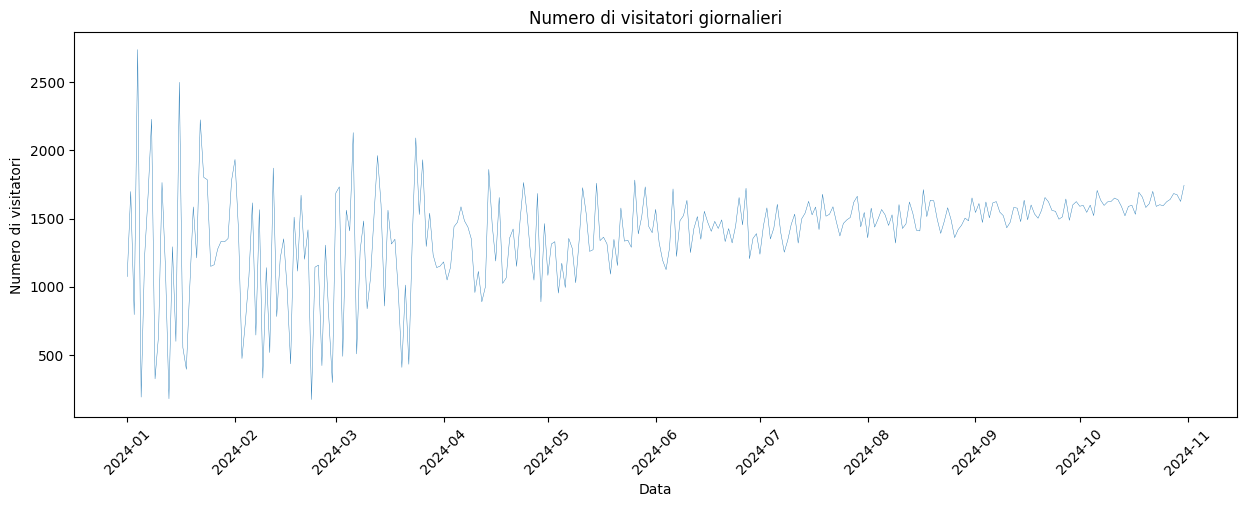

In [109]:
# creo un grafico a linee del numero di visitatori giornalieri

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(date.giorno, date.n_visitatori, linewidth=0.3)
ax.set_title("Numero di visitatori giornalieri")
ax.set_ylabel("Numero di visitatori")
ax.set_xlabel("Data")
plt.xticks(rotation=45)


#### Aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale

In [ ]:
#calcolo la media mobile a 7 giorni per mostrare la tendenza sett
date['media_mobile_7giorni'] = date.n_visitatori.rolling(window=7).mean()


(array([19723., 19754., 19783., 19814., 19844., 19875., 19905., 19936.,
        19967., 19997., 20028.]),
 [Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02'),
  Text(19783.0, 0, '2024-03'),
  Text(19814.0, 0, '2024-04'),
  Text(19844.0, 0, '2024-05'),
  Text(19875.0, 0, '2024-06'),
  Text(19905.0, 0, '2024-07'),
  Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11')])

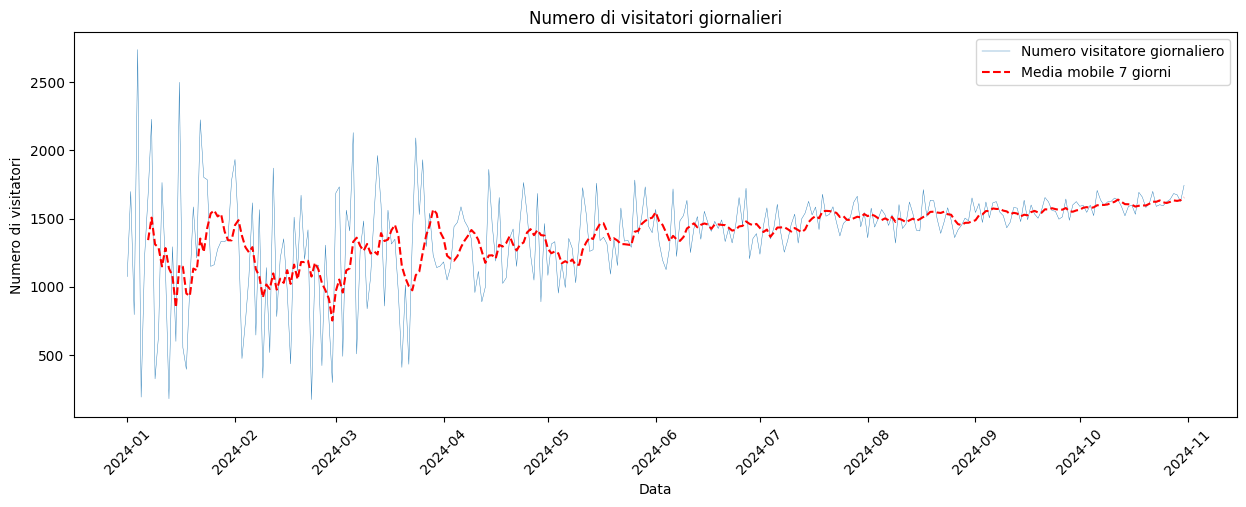

In [ ]:

fig, ax = plt.subplots(figsize=(15,5))
# parte per creare il grafico uguale a prima
ax.plot(date.giorno, date.n_visitatori, linewidth=0.3, label="Numero visitatore giornaliero")
# plot della media mobile
ax.plot(date.giorno, date.media_mobile_7giorni, color='red', linestyle='dashed', label='Media mobile 7 giorni')

ax.set_title("Numero di visitatori giornalieri")
ax.set_ylabel("Numero di visitatori")
ax.set_xlabel("Data")
ax.legend()
plt.xticks(rotation=45)


### creare un secondo grafico che mostri la media mensile dei visitatori.

C:\Users\Utente\AppData\Local\Temp\ipykernel_17624\4058785056.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(n_visitatori_giornalieri_mese, labels=date["mese"].unique())


Text(0, 0.5, 'Numero di visitatori')

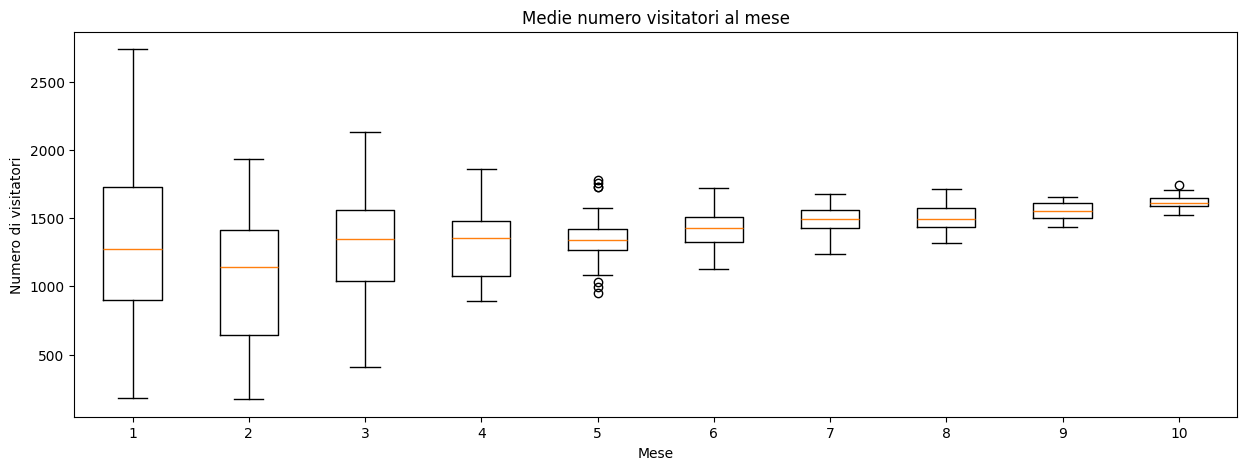

In [ ]:
# mostra media di ogni mese con boxplot

fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(n_visitatori_giornalieri_mese, labels=date["mese"].unique())
ax.set_title("Medie numero visitatori al mese")
ax.set_xlabel("Mese")
ax.set_ylabel("Numero di visitatori")


### creare un grafico che mostri la distribuzione dei motivi per il ricovero.

In [ ]:
# calcolo percentuali tre motivazioni per mese
n_visitatori_giornalieri_mese = []
cuore_mese = [0]*len(date["mese"].unique())
ossa_mese = [0]*len(date["mese"].unique())
testa_mese = [0]*len(date["mese"].unique())

# for per scorrere sui mesi
for i in date["mese"].unique():
    for giorno in date[date['mese'] == i]["giorno"]:
        for motivazione in visitatori[visitatori['data'] == giorno]["motivazione"]:
            if motivazione == "cuore":
                cuore_mese[i-1] += 1
            elif motivazione == "ossa":
                ossa_mese[i-1] += 1
            elif motivazione == "testa":
                testa_mese[i-1] += 1


In [161]:
mesi = pd.DataFrame({'mese': date["mese"].unique(), 'cuore': cuore_mese, 'ossa': ossa_mese, 'testa': testa_mese})

In [162]:
mesi

,mese,cuore,ossa,testa
0,1,13341,13402,13241
1,2,10115,10038,10098
2,3,13526,13631,13249
3,4,13138,13170,13066
4,5,13919,13912,13977
5,6,14295,14048,14394
6,7,15162,15454,15407
7,8,15713,15315,15486
8,9,15728,15380,15557
9,10,16757,16767,16633


Text(0, 0.5, 'Numero di visitatori')

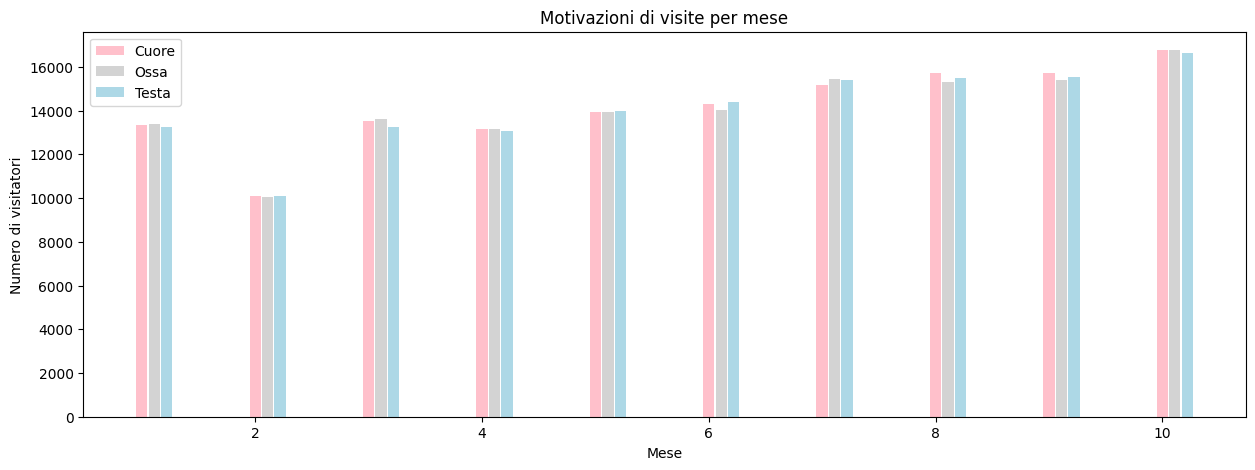

In [ ]:
# plot motivazioni per mese
fig, ax = plt.subplots(figsize=(15,5))
barwidth = 0.1
ax.bar(mesi["mese"], mesi["cuore"], width=barwidth, color="pink", label="Cuore")
ax.bar(mesi["mese"]+1.1*barwidth, mesi["ossa"], width=barwidth, color="lightgrey", label="Ossa")
ax.bar(mesi["mese"]+2.2*barwidth, mesi["testa"], width=barwidth, color="lightblue", label="Testa")

ax.legend()
ax.set_title("Motivazioni di visite per mese")
ax.set_xlabel("Mese")
ax.set_ylabel("Numero di visitatori")

In [185]:
mesi["tot"] = mesi["cuore"] + mesi["ossa"] + mesi["testa"]
mesi["cuore_percentuale"] = mesi["cuore"] / mesi.tot * 100
mesi["ossa_percentuale"] = mesi["ossa"] / mesi.tot * 100
mesi["testa_percentuale"] = mesi["testa"] / mesi.tot * 100

Text(0, 0.5, 'Percentuale di visitatori')

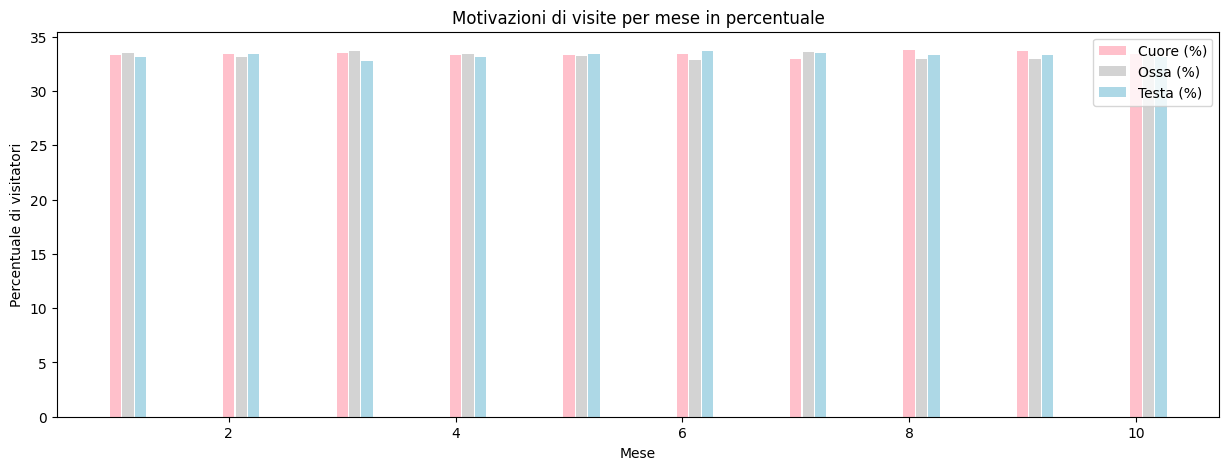

In [194]:
# plot motivazioni percentuali per mese


fig, ax = plt.subplots(figsize=(15,5))
barwidth = 0.1
ax.bar(mesi["mese"], mesi["cuore_percentuale"], width=barwidth, color="pink", label="Cuore (%)")
ax.bar(mesi["mese"]+1.1*barwidth, mesi["ossa_percentuale"], width=barwidth, color="lightgrey", label="Ossa (%)")
ax.bar(mesi["mese"]+2.2*barwidth, mesi["testa_percentuale"], width=barwidth, color="lightblue", label="Testa (%)")
#ax.barplot(x="mese", y="ossa", ax=ax, width=barwidth, color="grey", label="Ossa")
ax.legend()
ax.set_title("Motivazioni di visite per mese in percentuale")
ax.set_xlabel("Mese")
ax.set_ylabel("Percentuale di visitatori")